In [11]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import time
import cv2
import os

In [2]:
df = pd.read_csv('interpolated.csv')

In [3]:
df = df[df['frame_id'] == 'center_camera']
df

,index,timestamp,width,height,frame_id,filename,angle,torque,speed,lat,long,alt
1,2016-09-29 22:09:25.609972775,1475186965609972775,640,480,center_camera,center/1475186965609972775.jpg,-0.046314,-0.691983,14.607044,0.000000,0.000000,0.0
4,2016-09-29 22:09:25.659735933,1475186965659735933,640,480,center_camera,center/1475186965659735933.jpg,-0.047099,-0.560746,14.616667,0.000000,0.000000,0.0
7,2016-09-29 22:09:25.709975321,1475186965709975321,640,480,center_camera,center/1475186965709975321.jpg,-0.043633,-0.279869,14.613889,0.000000,0.000000,0.0
10,2016-09-29 22:09:25.759787059,1475186965759787059,640,480,center_camera,center/1475186965759787059.jpg,-0.040143,-0.002927,14.625130,0.000000,0.000000,0.0
13,2016-09-29 22:09:25.809874186,1475186965809874186,640,480,center_camera,center/1475186965809874186.jpg,-0.036652,-0.467918,14.617870,0.000000,0.000000,0.0
16,2016-09-29 22:09:25.859775341,1475186965859775341,640,480,center_camera,center/1475186965859775341.jpg,-0.034907,-0.187500,14.608246,0.000000,0.000000,0.0
19,2016-09-29 22:09:25.909878065,1475186965909878065,640,480,center_camera,center/1475186965909878065.jpg,-0.034907,-0.218168,14.572170,0.000000,0.000000,0.0
22,2016-09-29 22:09:25.959781540,1475186965959781540,640,480,center_camera,center/1475186965959781540.jpg,-0.031423,-0.187233,14.561135,0.000000,0.000000,0.0
25,2016-09-29 22:09:26.009852188,1475186966009852188,640,480,center_camera,center/1475186966009852188.jpg,-0.026180,-0.124914,14.522226,0.000000,0.000000,0.0
28,2016-09-29 22:09:26.059905256,1475186966059905256,640,480,center_camera,center/1475186966059905256.jpg,-0.026180,-0.124890,14.505565,0.000000,0.000000,0.0


In [4]:
df['timestamp'] = df['timestamp']/1000000000

In [5]:
df['angle'].max()

2.572615385055542

<IPython.core.display.Javascript object>


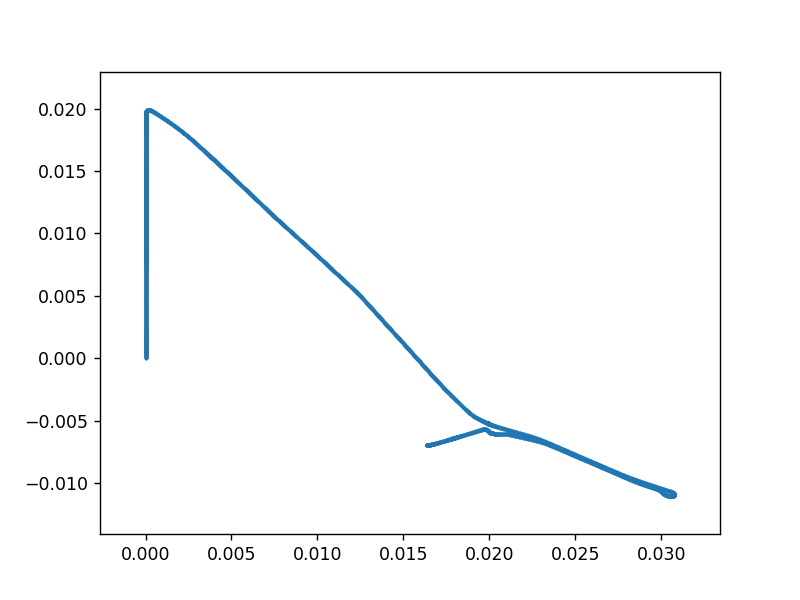

In [6]:
to_plot = 100
end_plot = -1


plt.scatter(-df['long'].values[to_plot:end_plot][::-1] + df['long'].values[to_plot], 
         -df['lat'].values[to_plot:end_plot][::-1] + df['lat'].values[to_plot], s=1, alpha=0.5)

In [7]:
def latlon_to_xy_grid(lat1, lon1, lat2, lon2): 
    dx = (lon1-lon2)*40075*math.cos((lat1+lat2)*math.pi/360)/360
    dy = (lat1-lat2)*40075/360
    return dx, dy

def rotate(x, y, rad):
    x_rot = math.cos(rad)*x - math.sin(rad)*y
    y_rot = math.sin(rad)*x + math.cos(rad)*y
    return x_rot, y_rot

In [8]:
import math

def rotate(x, y, rad):
    x_rot = np.cos(rad)*x - np.sin(rad)*y
    y_rot = np.sin(rad)*x + np.cos(rad)*y
    return -x_rot, y_rot

def get_cartesian(lat=None,lon=None):
    lat, lon = np.deg2rad(lat), np.deg2rad(lon)
    R = 6371 # radius of the earth
    x = R * np.cos(lat) * np.cos(lon)
    y = R * np.cos(lat) * np.sin(lon)
    z = R *np.sin(lat)
    return x,y,z

def ecef_to_enu(x, y, z, latRef, longRef, altRef):

    cosLatRef = math.cos(latRef * math.pi / 180)
    sinLatRef = math.sin(latRef * math.pi / 180)

    cosLongRef = math.cos(longRef * math.pi / 180)
    sinLongRef = math.sin(longRef * math.pi / 180)

    cRef = 1 / math.sqrt(cosLatRef * cosLatRef + (1 - f) * (1 - f) * sinLatRef * sinLatRef)

    x0 = (R*cRef + altRef) * cosLatRef * cosLongRef
    y0 = (R*cRef + altRef) * cosLatRef * sinLongRef
    z0 = (R*cRef*(1-e2) + altRef) * sinLatRef

    xEast = (-(x-x0) * sinLongRef) + ((y-y0)*cosLongRef)
    yNorth = (-cosLongRef*sinLatRef*(x-x0)) - (sinLatRef*sinLongRef*(y-y0)) + (cosLatRef*(z-z0))
    zUp = (cosLatRef*cosLongRef*(x-x0)) + (cosLatRef*sinLongRef*(y-y0)) + (sinLatRef*(z-z0))

    return xEast, yNorth, zUp

def to_car_reference(df):
    transformed = df[['lat', 'long']].values - df[['lat', 'long']].values[0]
    angle =  np.arctan2(transformed[5][0], transformed[5][1]) 
    lat, lon = rotate(transformed[:, 0], transformed[:, 1], (angle))
    X, Y, Z = get_cartesian(lat, lon)
    return Z*1000, Y*1000, X*1000, df['filename'].values

<IPython.core.display.Javascript object>


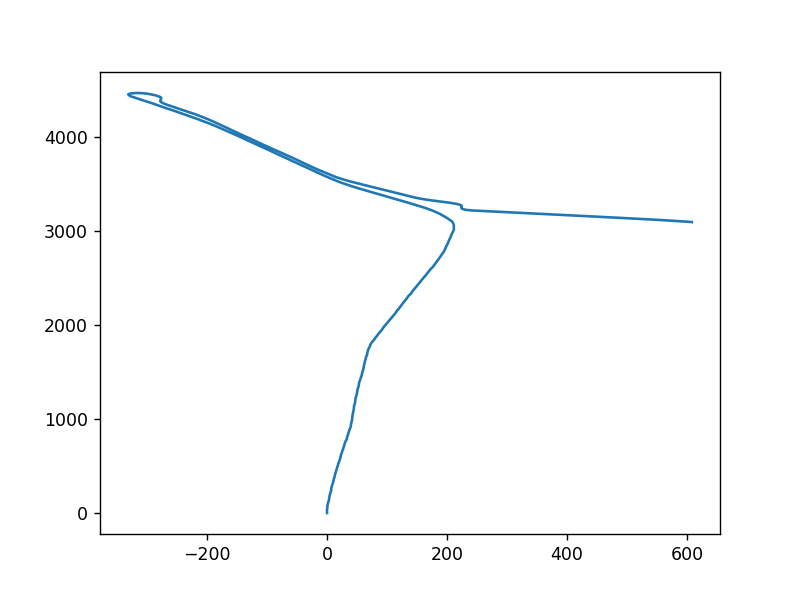

In [9]:
X, Y, Z, img_ids = to_car_reference(df[5500:])

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
ax.plot(X, Y)

<IPython.core.display.Javascript object>


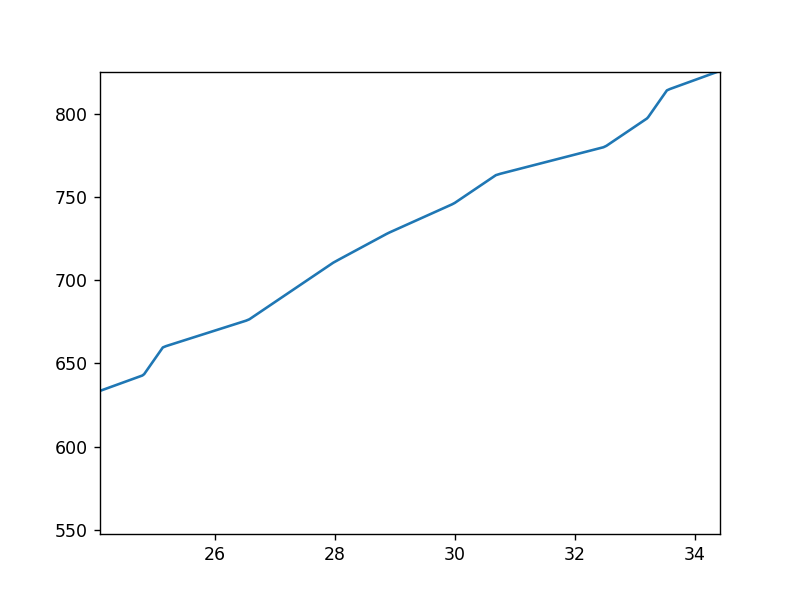

In [15]:
plt.plot(X, Y)

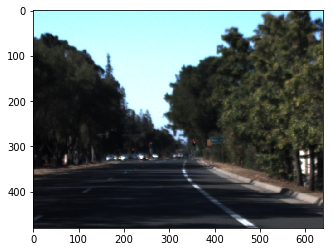

In [10]:
img = cv2.imread(os.path.join('data', img_ids[0]))[:, :, ::-1]
plt.imshow(img)

In [11]:
K = np.array([[2152.445406, 0.000000,    268.010970, 0],
              [0.000000,    2166.161453, 302.594211, 0],
              [0.000000,    0.000000,      1.000000, 0]])

In [56]:
def CartesianToCamera(X, Y, K, height = 0.12):
    coords = np.hstack([X.reshape(-1, 1), np.ones((len(Y), 1))*height, Y.reshape(-1, 1)])
    uv = ( K[:, :-1] @ coords[1:].T).T
    uv = uv[1:] / (uv[1:][:, -1].reshape(-1, 1)) 
    return uv[:, :-1]

In [13]:
uv = CartesianToCamera(X, Y, K)

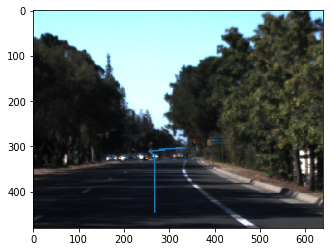

In [14]:
plt.plot(uv[:,0][:500], uv[:,1][:500])
plt.imshow(img)

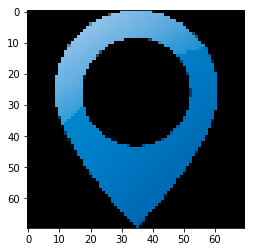

In [15]:
marker = cv2.imread('marker.png')[:, :, ::-1]
marker = cv2.resize(marker, (70 ,70))
plt.imshow(marker)

In [16]:
def overlay_transparent(background, overlay, x, y, alpha=0.85):

    background_width = background.shape[1]
    background_height = background.shape[0]

    if x >= background_width or y >= background_height:
        return background

    h, w = overlay.shape[0], overlay.shape[1]

    if x + w > background_width:
        w = background_width - x
        overlay = overlay[:, :w]

    if y + h > background_height:
        h = background_height - y
        overlay = overlay[:h]

    if overlay.shape[2] < 4:
        overlay = np.concatenate(
            [
                overlay,
                np.where(overlay != 0, 255, 0).astype(overlay.dtype)
            ],
            axis = 2,
        )
        
    overlay_image = overlay[..., :3]
    mask = overlay[..., 3:] / 255.0
    background[y:y+h, x:x+w] = background[y:y+h, x:x+w] * (1 - mask) + (1.0 - alpha) * mask * background[y:y+h, x:x+w] + mask * overlay_image * alpha 

    return background

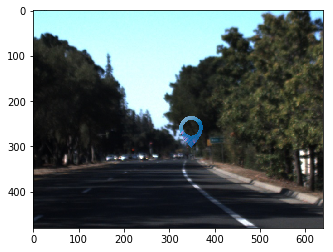

In [17]:
up_left = [int(uv[500, 0]) - 20 ,int(uv[500, 1]) - 70]

res = overlay_transparent(img.copy(), marker.copy(), up_left[0], up_left[1])
plt.imshow(res)

<IPython.core.display.Javascript object>


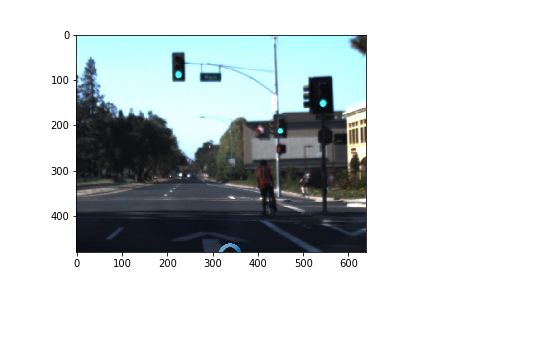

IndexError: index 5 is out of bounds for axis 0 with size 5

In [60]:
vid = []

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
uv_prev = None
for i in range(5895):
    X, Y, Z, img_ids = to_car_reference(df[5500+i:5800])
    img = cv2.imread(os.path.join('data', img_ids[0]))[:,:,::-1]
    uv = CartesianToCamera(X, Y, K, 0.5)
    up_left = [int(uv[-1, 0]) - 20 ,int(uv[-1, 1]) - 70]
    if uv_prev is not None:
        up_left = [int((uv_prev[0]*0.9 + up_left[0]*0.1)), int((uv_prev[1]*0.9 + up_left[1]*0.1))]
    uv_prev = up_left
    res = overlay_transparent(img.copy(), marker.copy(), up_left[0], up_left[1])
    img_ref = ax.imshow(res)
    fig.canvas.draw()
    img_ref.remove()
    vid.append(res)

In [51]:
from moviepy.editor import ImageSequenceClip

new_clip = ImageSequenceClip(vid, fps=24)
new_clip.write_videofile("AR.mp4") 

Moviepy - Building video AR.mp4.
Moviepy - Writing video AR.mp4



Moviepy - Done !
Moviepy - video ready AR.mp4


In [67]:
class Bicycle():
    def __init__(self):
        self.xc = 0
        self.yc = 0
        self.theta = 0
        self.delta = 0
        self.beta = 0
        self.first = True
        
        self.L = 2
        self.lr = self.L / 2
        self.w_max = 1.22
        
        self.previous_time = 0
        
    def reset(self):
        self.xc = 0
        self.yc = 0
        self.theta = 0
        self.delta = 0
        self.beta = 0
        
    def step(self, v, a_x, a_y, delta, current_time):
        
        if self.first:
            dt = 0.049
            self.first = False
        else:
            dt = current_time - self.previous_time
        
        self.xc = self.xc + v*np.cos(self.theta) * dt + 0.5 * a_x * dt ** 2
        self.yc = self.yc + v*np.sin(self.theta) * dt + 0.5 * a_y * dt ** 2
        self.theta = self.theta + v*np.cos(self.beta)*np.tan(self.delta)/self.L * dt
        self.delta = np.deg2rad(delta)
        #self.delta = delta
        self.beta = np.arctan(self.lr*self.delta/self.L)
        
        self.previous_time = current_time

In [10]:
for filename in df['filename'].values[6000:6500]:
    
    img = cv2.imread(os.path.join('data', filename))
    cv2.imshow('img', img)
    
    k = cv2.waitKey(ord('q'))
    if k == -1: 
        continue
    else:
        break
    
while(True):
    k = cv2.waitKey(ord('q'))
    if k == -1:  # if no key was pressed, -1 is returned
        continue
    else:
        break
        
cv2.destroyWindow('img')

<IPython.core.display.Javascript object>


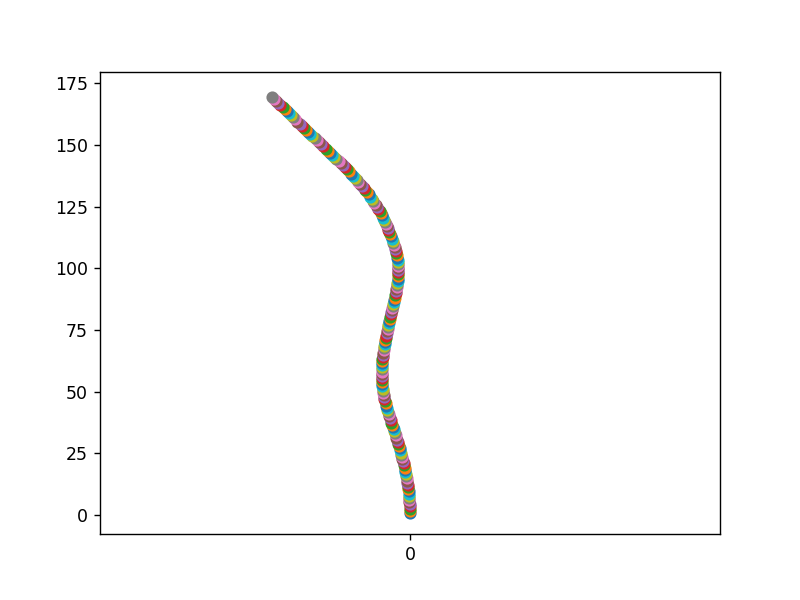

0
26449
26454
26459
26464
26469
26474
26479
26484
26489
26494
26499
26504
26509
26514
26519
26524
26529
26534
26539
26544
26549
26554
26559
26564
26569
26574
26579
26584
26589
26594
26599
26604
26609
26614
26619
26624
26629
26634
26639
26644
26649
26654
26659
26664
26669
26674
26679
26684
26689
26694
26699
26704
26709
26714
26719
26724
26729
26734
26739
26744
26749
26754
26759
26764
26769
26774
26779
26784
26789
26794
26799
26804
26809
26814
26819
26824
26829
26834
26839
26844
26849
26854
26859
26864
26869
26873
26879
26883
26888
26893
26898
26903
26908
26913
26918
26923
26928
26933
26938
26943
26948
26953
26958
26963
26968
26973
26978
26983
26988
26993
26998
27003
27008
27013
27018
27023
27028
27033
27038
27043
27048
27053
27058
27063
27068
27073
27078
27083
27088
27093
27098
27103
27108
27113
27118
27123
27128
27133
27138
27143
27148
27153
27158
27163
27168
27173
27178
27183
27188
27193
27198
27203
27208
27213
27218
27223
27228
27233
27238
27243
27248
27253
27258
27263
27268
27273
27

In [87]:
# 4800 -> #6000

model = Bicycle()
model.reset()

steering = []
xs = []
ys = []

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
plt.xticks(np.arange(-100, 100, 100))

fig.show()
fig.canvas.draw()

start = 5300

for v, delta, current_time, filename in df[['speed', 'angle', 'timestamp', 'filename']][start:].values:
    
    #plt.cla()]
    
    print(acc_idx)
    acc_idx = abs(ins['timestamp'].values - current_time).argmin()
    acc_x = ins['ax'].values[acc_idx]
    acc_y = ins['ay'].values[acc_idx]
    model.step(v, acc_x, acc_y, delta, current_time)
    xs.append(model.xc)
    ys.append(model.yc)
    steering.append(delta)
    ax.scatter(model.yc, model.xc)
    #ax.plot(ys, xs)
    fig.canvas.draw()
    #plt.pause(0.0001)
    #print(filename)
    
    img = cv2.imread(os.path.join('data', filename))
    cv2.imshow('img', img)
    
    k = cv2.waitKey(ord('q'))
    if k == -1: 
        continue
    else:
        break
    
while(True):
    k = cv2.waitKey(ord('q'))
    if k == -1:  # if no key was pressed, -1 is returned
        continue
    else:
        break
        
cv2.destroyWindow('img')
    


<IPython.core.display.Javascript object>


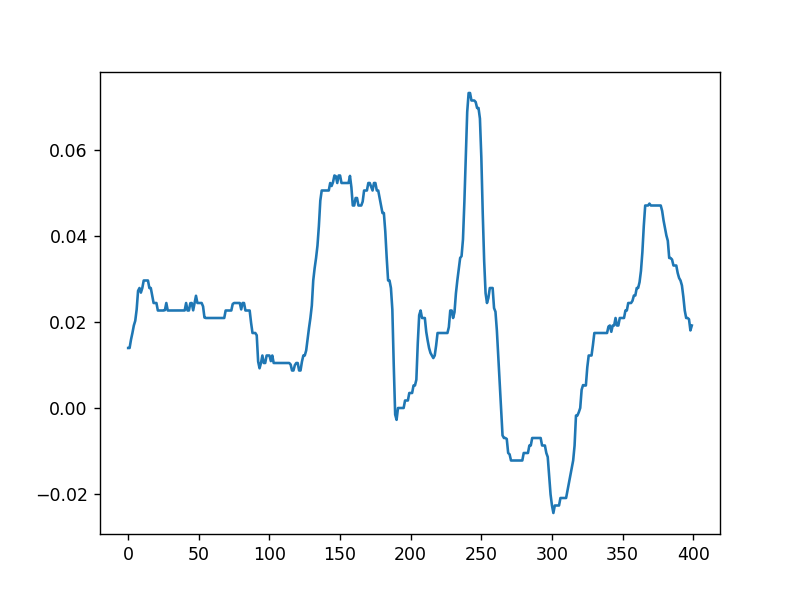

In [34]:
plt.plot((steering))

<IPython.core.display.Javascript object>


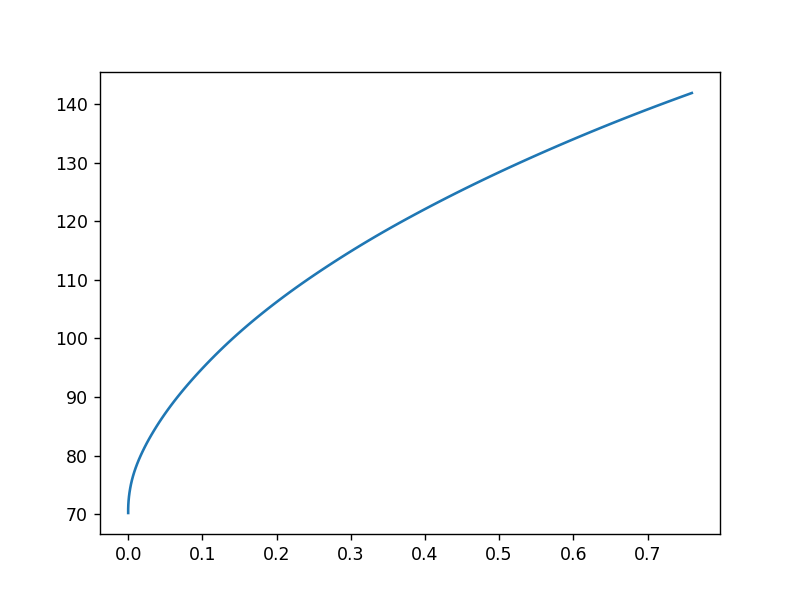

In [39]:
xs = []
ys = []

model.reset()

for v, delta, current_time in df[['speed', 'angle', 'timestamp']].values[600:700]:
    
    model.step(v, delta, current_time)
    xs.append(model.xc)
    ys.append(model.yc)
    
plt.plot(ys, xs)
plt.show()

## Odometery

In [10]:
frame1 = cv2.imread(os.path.join('data', df['filename'].values[500]), 0)
frame2 = cv2.imread(os.path.join('data', df['filename'].values[501]), 0)

In [31]:
sift = cv2.xfeatures2d.SIFT_create()  
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

In [32]:
kp1, des1 = sift.detectAndCompute(frame1,None)
kp2, des2 = sift.detectAndCompute(frame2,None)

In [33]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [34]:
matches = flann.knnMatch(des1,des2,k=2)  

In [55]:
features1 = []
features2 = []
good = []

for m,n in matches:
    if m.distance < 0.6*n.distance:
        #generates a set of common features for respective frame coordinates
        features1.append(kp1[m.queryIdx].pt)        
        features2.append(kp2[m.trainIdx].pt)
        good.append([m, n])
        
features1 = np.int32(features1)
features2 = np.int32(features2)

In [56]:
len(features1)

243

<IPython.core.display.Javascript object>


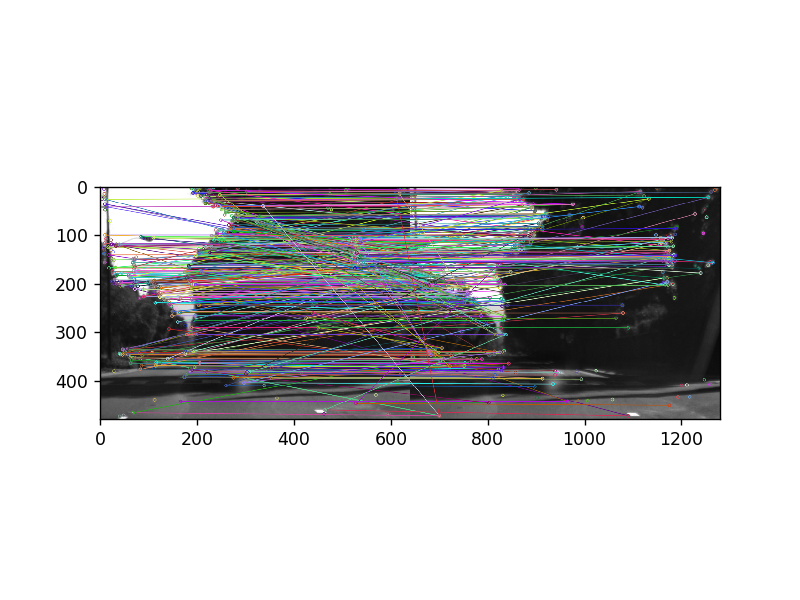

In [57]:
img3 = cv2.drawMatchesKnn(frame1, kp1, frame2, kp2, good, None)
plt.imshow(img3)

In [77]:
a= df[['lat', 'long']].values[50] - df[['lat', 'long']].values[51]

In [79]:
a[0]*1000

0.012265991330195902

In [84]:
ins = pd.read_csv('imu.csv')
ins['timestamp'] = ins['timestamp']/1000000000

In [43]:
len(str(df['timestamp'].values[0])) 

19

In [16]:
(ins['timestamp'].values[1] - ins['timestamp'].values[0]) / (df['timestamp'].values[1] - df['timestamp'].values[0])

0.009655952453613281

In [86]:
abs(df['timestamp'].values - ins['timestamp'].values[60]).argmin()

10

1475186965.6099727

In [48]:
df['timestamp'].values - ins['timestamp'].values[10000]

array([-100153338441, -100103575283, -100053335895, ...,  660402677066,
        660452640335,  660502734914], dtype=int64)

In [32]:
ins['timestamp'].values[10000]

1475187065.7633111

<IPython.core.display.Javascript object>


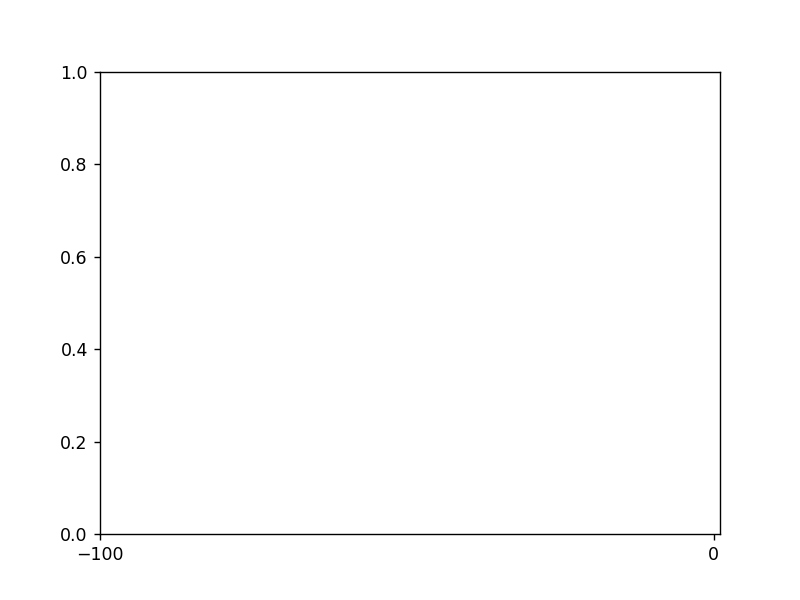

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
plt.xticks(np.arange(-100, 100, 100))

fig.show()
fig.canvas.draw()


xs = []
ys = []


x = 0
z = 0

for i in range(1, len(imu)):
    
    dt = imu['timestamp'][i] - imu['timestamp'][i-1]
    
    a_x = imu['ax'][i]
    a_z = imu['az'][i]
    a_y = imu['ay'][i]
    
    x += a_x * dt**2
    z += a_z * dt**2
    
    xs.append(x)
    ys.append(z)
    
    #ax.scatter(x, z)
    #fig.canvas.draw()

<IPython.core.display.Javascript object>


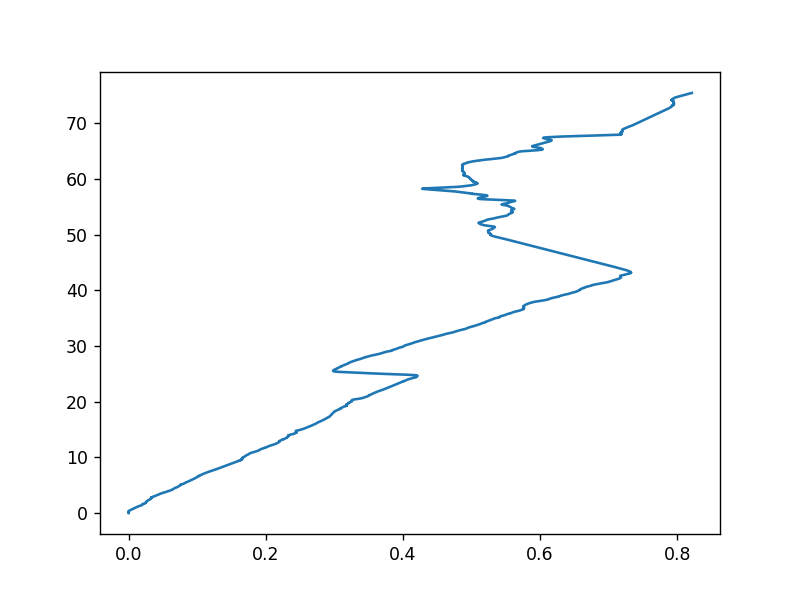

In [97]:
plt.plot(xs, ys)

In [ ]:
def return_polyfit_line(points, degree=10):

    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]
    x_needed = []
    y_needed = np.arange(0, 100, 1) 
    for i in y_needed:
        idx = abs(y - i).argmin()
        x_needed.append(x[idx])
    return x_needed, y_needed

In [3]:
import os
len(os.listdir('./data/center'))

10000